### 1. Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('processed/1044 - final data.csv',
                index_col=0,
                parse_dates=True)
df.head()

,P1,P2,P3,T1,T2,T3,TA,TG,PO,QG
2016-01-05 10:30:00,7.498104,7.301981,5.388890,64.237796,41.667869,34.000999,2.984202,12.095092,5.311047,232515.005721
2016-01-05 11:00:00,7.490100,7.292095,5.373202,64.252134,41.693662,33.901342,3.532487,12.095025,5.295226,232459.555648
2016-01-05 11:30:00,7.498063,7.300164,5.379413,64.260998,41.741951,33.983417,4.731002,12.097428,5.301490,232665.798852
2016-01-05 12:00:00,7.504444,7.309115,5.383830,64.269746,41.758143,34.089899,5.810583,12.092499,5.305113,232680.430678
2016-01-05 12:30:00,7.491825,7.295716,5.377536,64.345201,41.742924,34.042069,6.232343,12.088733,5.298257,232647.452201


In [3]:
display(df.info())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5620 entries, 2016-01-05 10:30:00 to 2019-12-26 00:00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      5620 non-null   float64
 1   P2      5620 non-null   float64
 2   P3      5620 non-null   float64
 3   T1      5620 non-null   float64
 4   T2      5620 non-null   float64
 5   T3      5620 non-null   float64
 6   TA      5620 non-null   float64
 7   TG      5620 non-null   float64
 8   PO      5620 non-null   float64
 9   QG      5620 non-null   float64
dtypes: float64(10)
memory usage: 483.0 KB


None

(5620, 10)

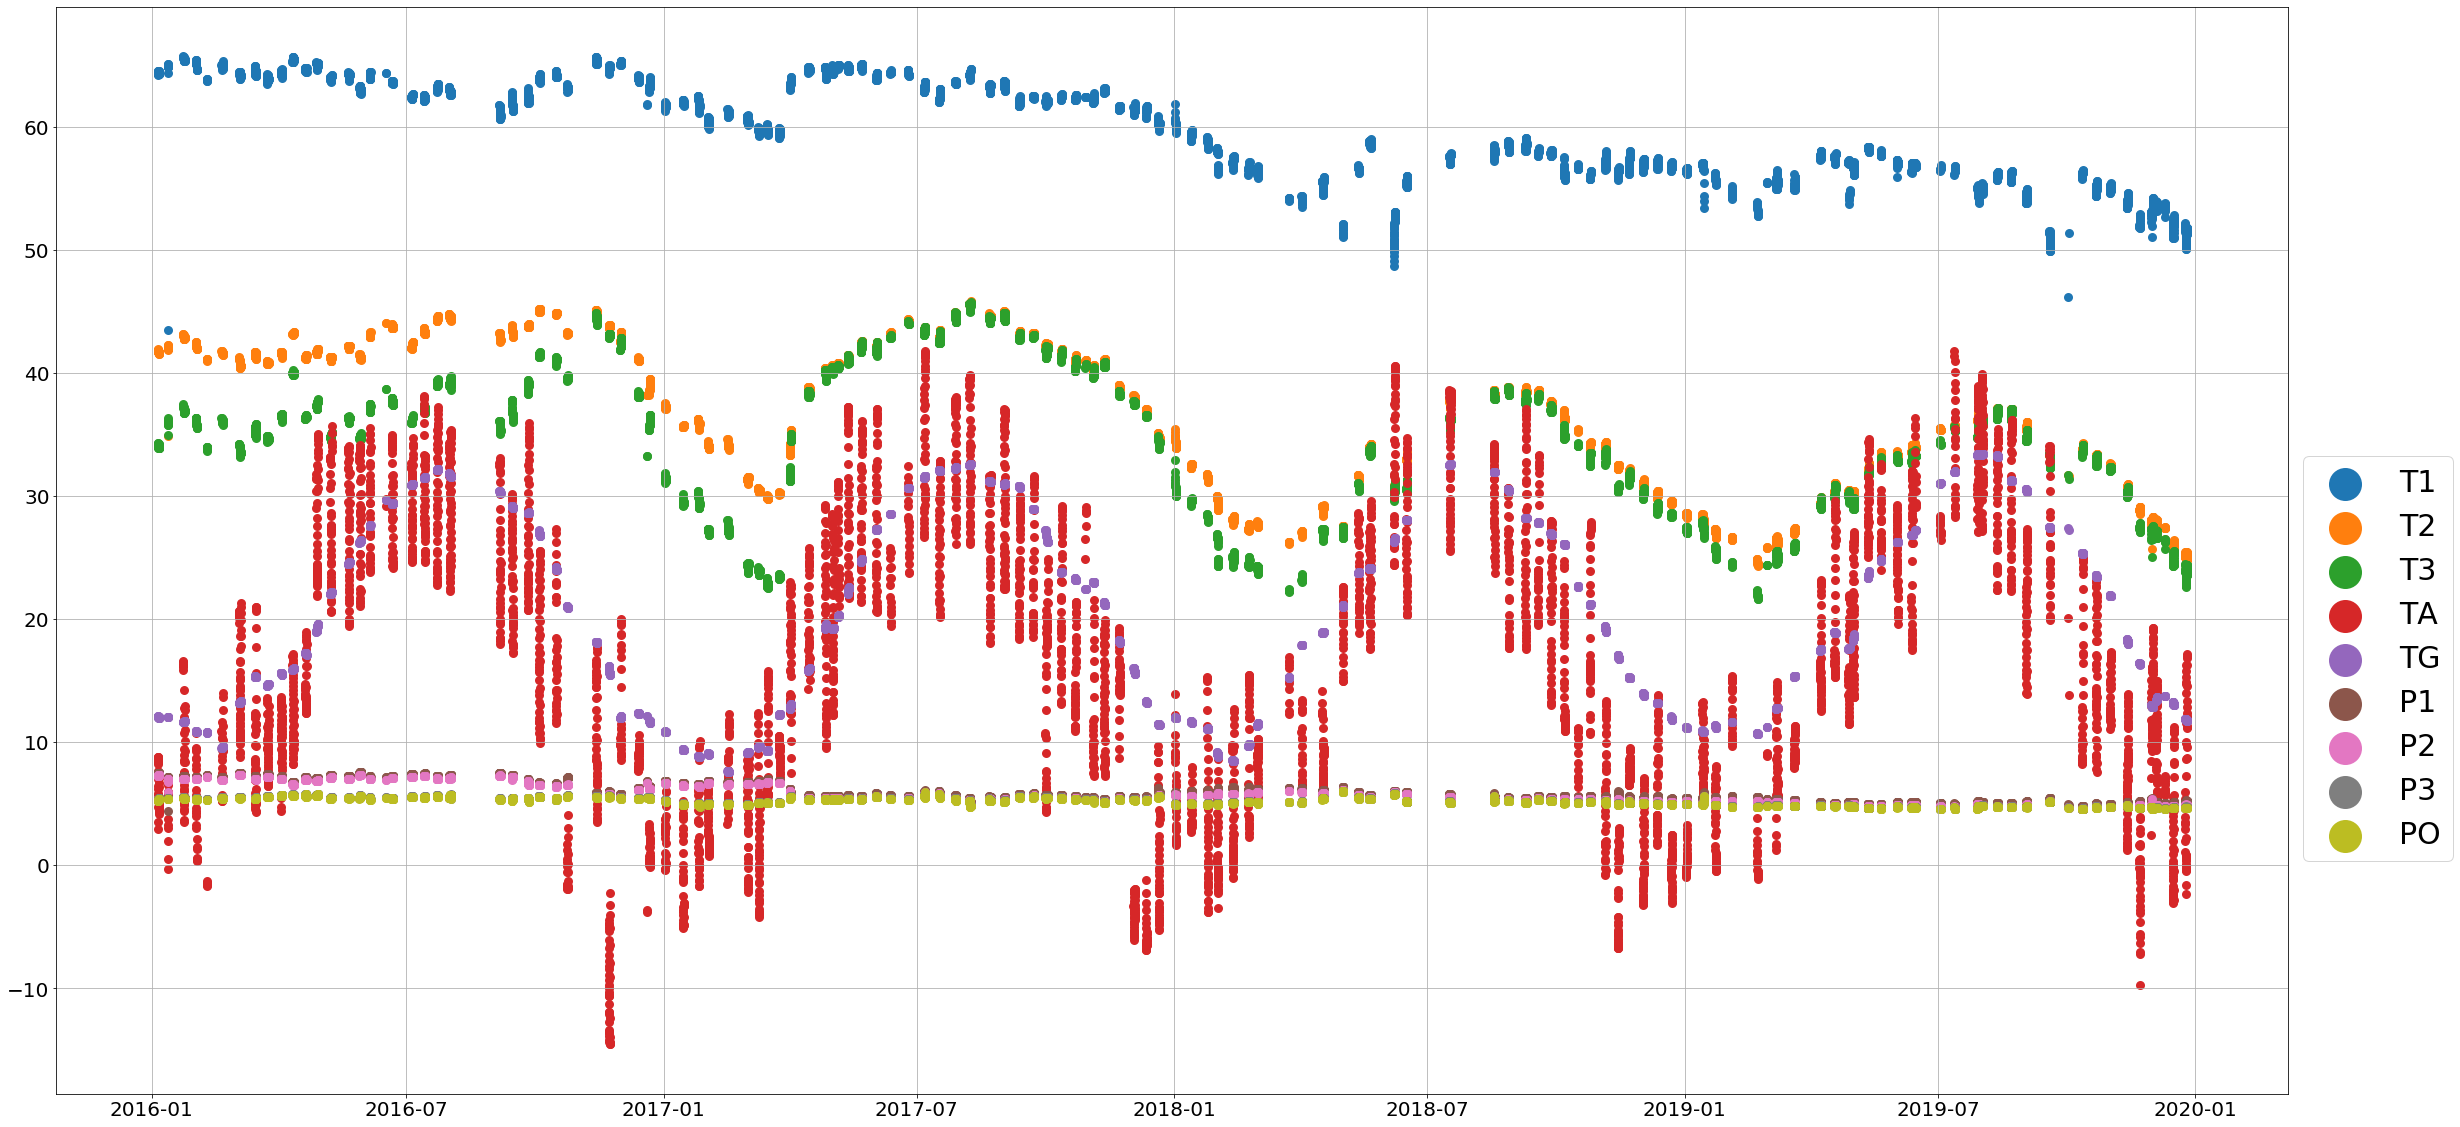

In [4]:
#создание графика для параметров
plt.figure(figsize = (40, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.grid(True)
x = df.index
plt.scatter(x, df['T1'], label = 'Т1', linewidth = 3)
plt.scatter(x, df['T2'], label = 'Т2', linewidth = 3)
plt.scatter(x, df['T3'], label = 'Т3', linewidth = 3)
plt.scatter(x, df['TA'], label = 'ТA', linewidth = 3)
plt.scatter(x, df['TG'], label = 'ТG', linewidth = 3)
plt.scatter(x, df['P1'], label = 'P1', linewidth = 3)
plt.scatter(x, df['P2'], label = 'P2', linewidth = 3)
plt.scatter(x, df['P3'], label = 'P3', linewidth = 3)
plt.scatter(x, df['PO'], label = 'PO', linewidth = 3)
plt.legend(bbox_to_anchor=(1, 0.6), loc='best', fontsize=30, markerscale=5)

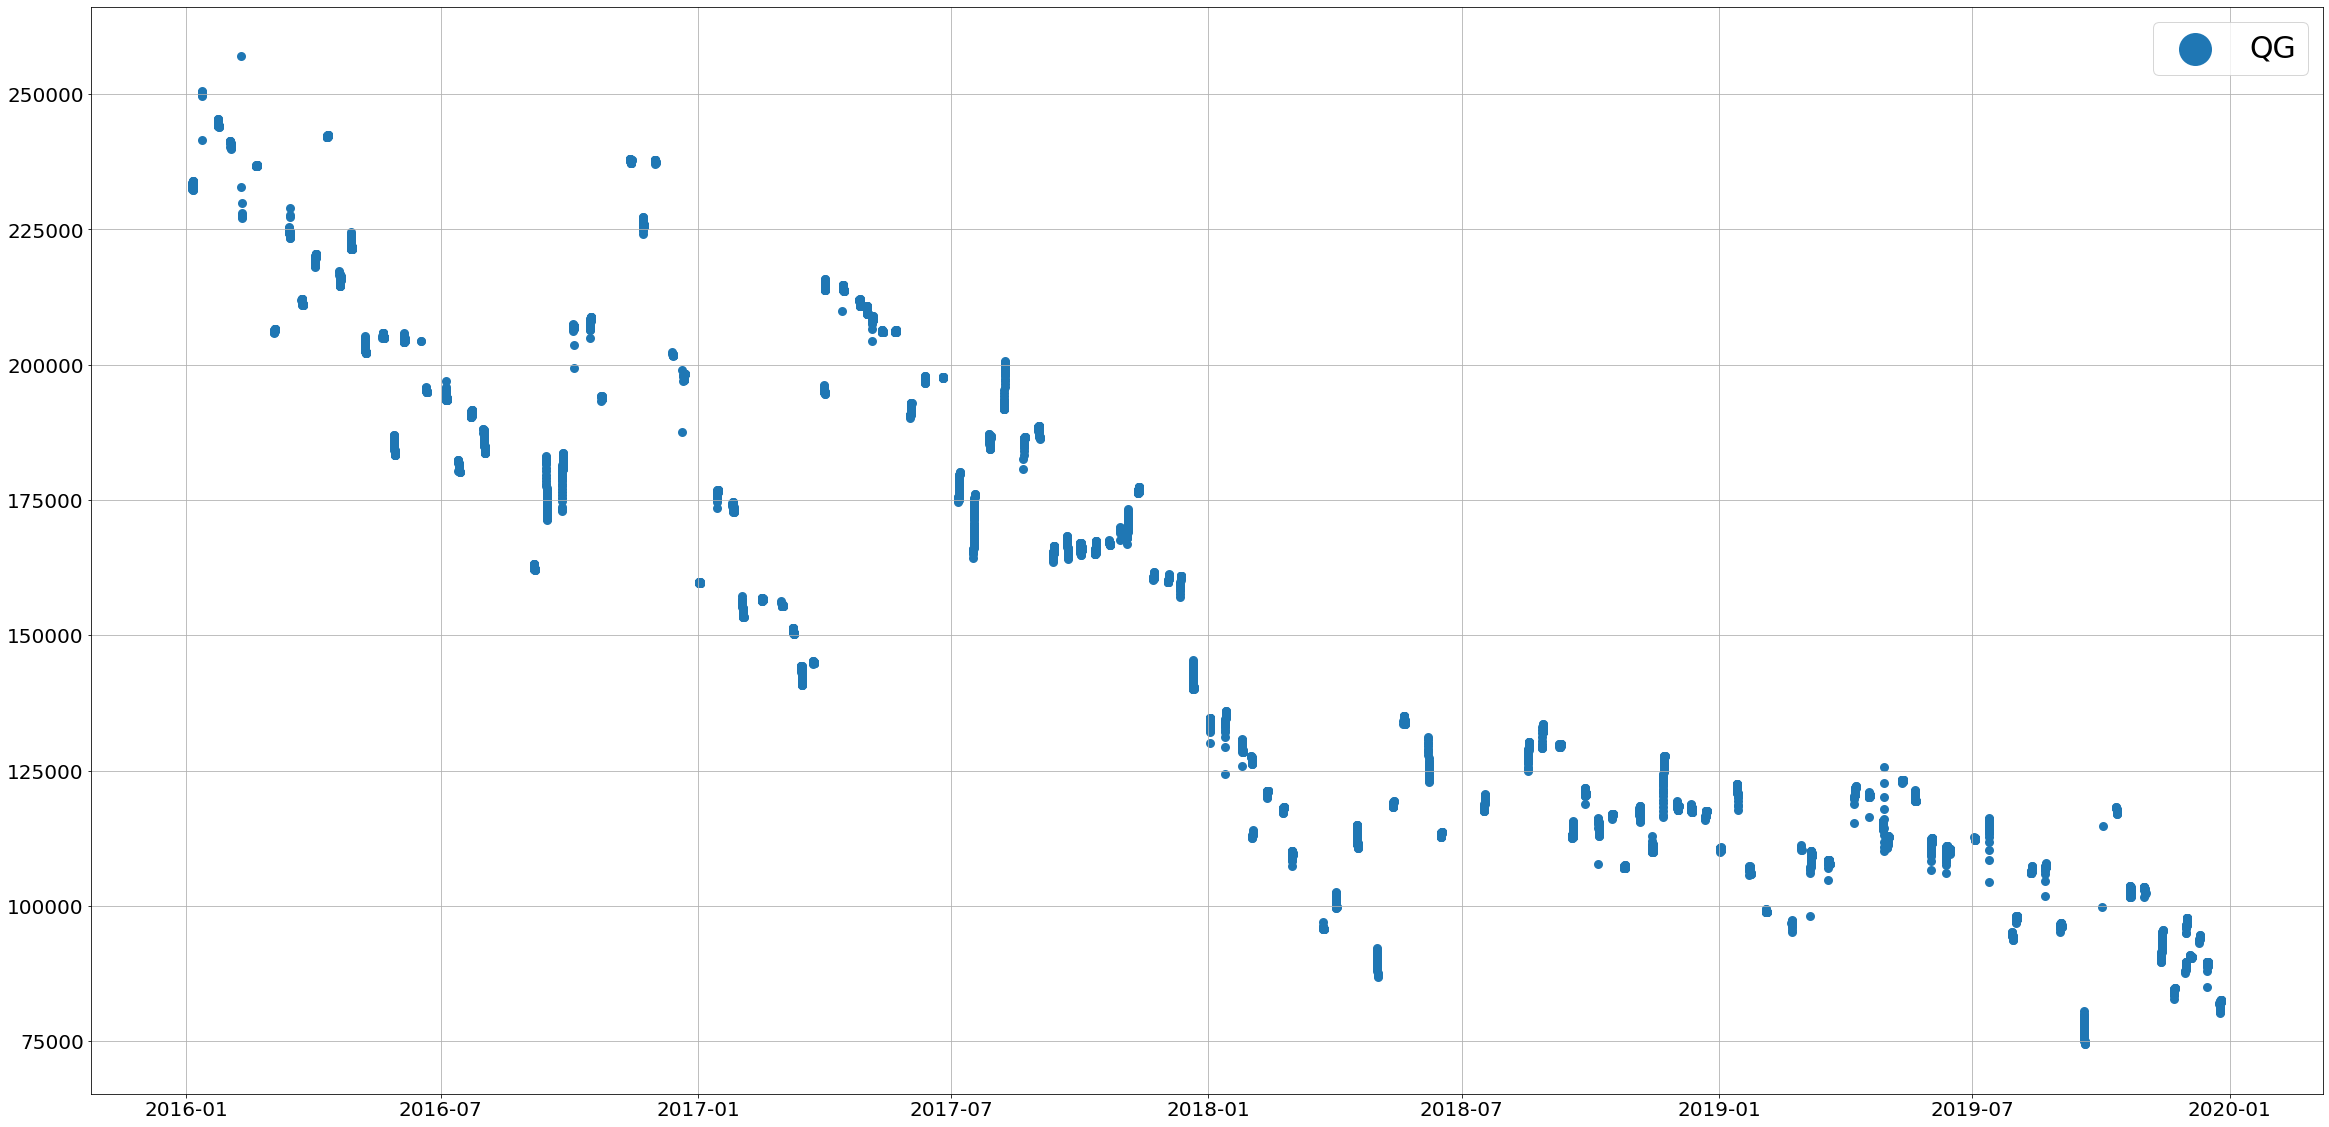

In [5]:
#создание графика для целевой переменной (дебита)
plt.figure(figsize = (40, 20))
plt.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.grid(True)
x = df.index
plt.scatter(x, df['QG'], label = 'QG', linewidth = 3)
plt.legend(loc='best', fontsize=30, markerscale=5)

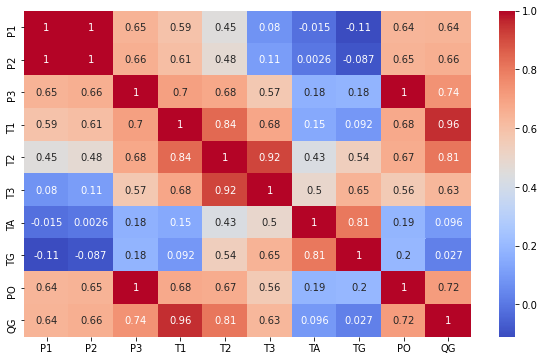

In [6]:
#создание тепловой карты корреляции
plt.figure(figsize=(10, 6))
correlation = df.corr()
sns.heatmap(correlation, annot = True, cmap =  'coolwarm')
plt.show()

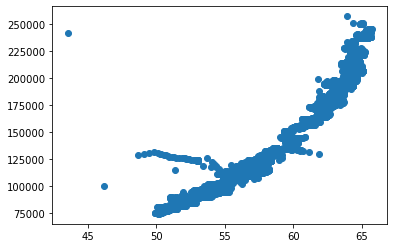

In [7]:
plt.scatter(df['T1'], df['QG'])

In [8]:
x_train = df['2016-01-01' : '2018-06-30']
y_train = x_train.pop('QG')
x_test = df['2018-07-01' : '2019-12-26']
y_test = x_test.pop('QG')

### Отбор параметров с помощью случайного леса

In [9]:
rf = RandomForestRegressor(n_estimators=200,
                          n_jobs=-1,
                          random_state=1,
                          criterion='mae',
                          max_depth=4)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
df_importances = sorted(list(zip(x_train.columns, rf.feature_importances_.ravel())), key = lambda tpl: tpl[1], reverse = True)

In [ ]:
df_importances = pd.DataFrame(df_importances, columns = ['features', 'importance'])
df_importances = df_importances.set_index('features')
df_importances.plot(kind = 'bar', figsize = (15, 3))
plt.show()

In [ ]:
features = ['T1', 'TG', 'T2', 'P2', 'P1']

### Линейная регрессия

In [ ]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(x_train, y_train)
y_pred_1 = lin_reg_1.predict(x_test)

In [ ]:
print ('MAE:', mean_absolute_error(y_test, y_pred_1)) 
print ('MSE:', mean_squared_error(y_test, y_pred_1))

### Полиномиальная регрессия

In [ ]:
x_test_1 = np.array(x_test).reshape(-1, 9)
x_train_1 = np.array(x_train).reshape(-1, 9)
y_test_1 = np.array(y_test).reshape(-1, 1)
y_train_1 = np.array(y_train).reshape(-1, 1)

In [ ]:
quadratic = PolynomialFeatures(degree=2)
x_quad = quadratic.fit_transform(x_train_1)

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2 = lin_reg_2.fit(x_quad, y_train_1)
y_pred_2 = lin_reg_2.predict(quadratic.fit_transform(x_test_1))

In [ ]:
print ('MAE:', mean_absolute_error(y_test_1, y_pred_2)) 
print ('MSE:', mean_squared_error(y_test_1, y_pred_2))

### Полиномиальная регрессия с отбором параметров

In [ ]:
x_test_2 = np.array(x_test[features]).reshape(-1, 5)
x_train_2 = np.array(x_train[features]).reshape(-1, 5)
y_test_2 = np.array(y_test).reshape(-1, 1)
y_train_2 = np.array(y_train).reshape(-1, 1)

In [ ]:
quadratic = PolynomialFeatures(degree=2)
x_quad = quadratic.fit_transform(x_train_2)

In [ ]:
lin_reg_3 = LinearRegression()
lin_reg_3 = lin_reg_3.fit(x_quad, y_train_2)
y_pred_3 = lin_reg_3.predict(quadratic.fit_transform(x_test_2))

In [ ]:
print ('MAE:', mean_absolute_error(y_test_2, y_pred_3)) 
print ('MSE:', mean_squared_error(y_test_2, y_pred_3))